In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.probability import FreqDist

import matplotlib.pyplot as plt

In [2]:
#pip install pystan==2.19.1.1

In [3]:
#pip install prophet

In [4]:
rep_df = pd.read_excel(open('NISHw2.xlsx', 'rb'),sheet_name='Report', skiprows=[0])  

In [5]:
rep_df

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13625,Вконтакте,-25758_79797,Changellenge >> Карьера от студента к СЕО,#education@changellengeglobal #Changellenge #C...,Позитив,2021-09-01 08:12:00,0,1,0,3430.0,0,0,0,0,0,0
13626,Вконтакте,-68023176_17665,AppTractor,В этой статье я хотел бы поделиться своим опыт...,Нейтральность,2021-09-01 08:08:37,0,1,0,160.0,0,0,0,0,0,0
13627,Вконтакте,-66178731_602,Управление проектами в России | ГК ПМСОФТ,#ДЕНЬЗНАНИЙ #1СЕНТЯБРЯ #ПМСОФТ\n🍁☀️🧁🎈💐\n\n#сп...,Позитив,2021-09-01 08:01:23,0,3,0,66.0,0,0,0,0,0,0
13628,Вконтакте,-139121250_17894,iT News,Microsoft раскрыла дату выхода Windows 11\n \n...,Нейтральность,2021-09-01 08:00:01,0,6,4,896.0,0,0,0,0,0,0


In [6]:
com_df = pd.read_excel(open('NISHw2.xlsx', 'rb'),sheet_name='Comments', skiprows=[0])  

In [7]:
com_df

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1
...,...,...,...,...,...,...,...,...,...
21493,Вконтакте,-24682865_28855,608612_29743,Алексей Рысаков,608612,С мая месяца мурыжат с возвратом денег. Все за...,Негатив,2021-12-08 19:23:12,1
21494,Вконтакте,-24682865_28855,514006271_30353,Red Kirill,514006271,Нет войне!,Нейтральность,2022-03-01 14:40:12,0
21495,Вконтакте,-139121250_17896,551359045_17980,Владимир Прин,551359045,Чот много смартфонов на винде я погляжу,Нейтральность,2021-09-05 19:02:41,0
21496,Вконтакте,-139121250_17896,510436278_17982,Дима Асеев,510436278,"На тот момент система была хорошей, и мне каже...",Нейтральность,2021-09-05 19:06:47,8


In [8]:
rep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Социальная сеть              13630 non-null  object 
 1   ID поста                     13630 non-null  object 
 2   Владелец                     13630 non-null  object 
 3   Текст                        13630 non-null  object 
 4   Эмоциональный окрас          13630 non-null  object 
 5   Дата                         13630 non-null  object 
 6   Комментариев                 13630 non-null  int64  
 7   Лайков                       13630 non-null  int64  
 8   Репостов                     13630 non-null  int64  
 9   Просмотров                   13593 non-null  float64
 10  Негативных комментариев      13630 non-null  int64  
 11  Позитивных комментариев      13630 non-null  int64  
 12  Нейтральных комментариев     13630 non-null  int64  
 13  Неопределенных к

In [9]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21498 entries, 0 to 21497
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Социальная сеть      21498 non-null  object
 1   ID поста             21498 non-null  object
 2   ID комментария       21498 non-null  object
 3   Владелец             21498 non-null  object
 4   ID Владелеца         21498 non-null  int64 
 5   Текст                21497 non-null  object
 6   Эмоциональный окрас  21498 non-null  object
 7   Дата                 21498 non-null  object
 8   Лайков               21498 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


In [10]:
mask= com_df['Текст'].isna()

In [11]:
mask[mask == True].index.tolist()

[10440]

In [12]:
com_df = com_df.drop(10440)

In [13]:
rep= rep_df['Просмотров'].isna()

In [14]:
rep[rep == True].index.tolist()

[597,
 1148,
 1160,
 1300,
 1459,
 2376,
 2475,
 2526,
 3846,
 4464,
 4685,
 5511,
 5612,
 5826,
 6031,
 6868,
 6926,
 7638,
 7732,
 7841,
 8195,
 8885,
 9491,
 9518,
 9615,
 10416,
 10926,
 11796,
 12316,
 12463,
 12471,
 12476,
 12480,
 12513,
 13002,
 13033,
 13034]

In [15]:
rep_df['Просмотров'] = rep_df['Просмотров'].fillna(0)

## 2. Определить топ 10 биграмм в постах и топ 10 биграмм в комментариях.

Убираю все ссылки, знаки и слова, которые содержат меньше 3 букв из постов и комментариев 

In [16]:
rep_df['Текст'] = rep_df['Текст'].apply(lambda x: re.sub(r'http\S+', '', x))
com_df['Текст'] = com_df['Текст'].apply(lambda x: re.sub(r'http\S+', '', x))

In [17]:
rep_df['Текст'] = rep_df['Текст'].replace('-', ' ', regex= True)
com_df['Текст'] = com_df['Текст'].replace('-', ' ', regex= True)

In [18]:
com_df['Текст'] = com_df['Текст'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-Я\s]', '', x))
com_df['Текст'] = com_df['Текст'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))

In [19]:
# Создание списка биграмм для каждого текста
com_df['bigrams'] = com_df['Текст'].apply(lambda x: list(bigrams(nltk.word_tokenize(x))))

# Объединение всех биграмм в список
all_bigrams = [bigram for bigram_list in com_df['bigrams'] for bigram in bigram_list]

# Подсчет частотности каждой биграммы
freq_dist = FreqDist(all_bigrams)

# Вывод топ-10 биграмм
top_10_bigrams = freq_dist.most_common(10)
print(top_10_bigrams)

[(('моей', 'ссылке'), 288), (('бесплатным', 'обслуживанием'), 239), (('обслуживанием', 'навсегда'), 199), (('бесплатное', 'обслуживание'), 148), (('блэк', 'бесплатным'), 141), (('Тинькофф', 'блэк'), 138), (('Добрый', 'день'), 133), (('ссылке', 'получи'), 132), (('месяца', 'подписки'), 129), (('карты', 'бесплатно'), 126)]


In [20]:
top_10_comments = pd.DataFrame({'Comments': top_10_bigrams})
print(top_10_comments)

                             Comments
0               ((моей, ссылке), 288)
1  ((бесплатным, обслуживанием), 239)
2    ((обслуживанием, навсегда), 199)
3   ((бесплатное, обслуживание), 148)
4           ((блэк, бесплатным), 141)
5             ((Тинькофф, блэк), 138)
6               ((Добрый, день), 133)
7             ((ссылке, получи), 132)
8           ((месяца, подписки), 129)
9           ((карты, бесплатно), 126)


In [21]:
rep_df['Текст'] = rep_df['Текст'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-Я\s]', '', x))
rep_df['Текст'] = rep_df['Текст'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))

In [22]:
# Создание списка биграмм для каждого текста
rep_df['bigrams'] = rep_df['Текст'].apply(lambda x: list(bigrams(nltk.word_tokenize(x))))

# Объединение всех биграмм в список
bigrams_rep = [bigram for bigram_list in rep_df['bigrams'] for bigram in bigram_list]

# Подсчет частотности каждой биграммы
rep_dist = FreqDist(bigrams_rep)

# Вывод топ-10 биграмм
top_10_bigrams_rep = rep_dist.most_common(10)
print(top_10_bigrams_rep)

[(('Технополис', 'Москва'), 302), (('этом', 'году'), 252), (('информационной', 'безопасности'), 214), (('многое', 'другое'), 199), (('принять', 'участие'), 198), (('Blockchain', 'Life'), 196), (('Data', 'Science'), 194), (('может', 'быть'), 162), (('нашем', 'сайте'), 161), (('Количество', 'страниц'), 155)]


In [23]:
top_10_posts = pd.DataFrame({'Posts': top_10_bigrams_rep})

print(top_10_posts)

                                   Posts
0            ((Технополис, Москва), 302)
1                    ((этом, году), 252)
2  ((информационной, безопасности), 214)
3                ((многое, другое), 199)
4              ((принять, участие), 198)
5              ((Blockchain, Life), 196)
6                 ((Data, Science), 194)
7                   ((может, быть), 162)
8                  ((нашем, сайте), 161)
9           ((Количество, страниц), 155)



## 1. Определить 3 поста с самой сильной и 3 поста с самой слабой мерой связи окраса поста с окрасом его комментариев. Обосновать методику расчета силы связи.

а не. тут всё можно по 1 таблице смотреть. куз_ва имеет столбец с эмоциональным окрасом поста и комментариев

In [24]:
#rep_df

In [25]:
#rep_df["Эмоциональный окрас"].unique()

In [26]:
# вычисляем долю каждого вида комментариев для каждого поста
#rep_df['negative'] = rep_df['Негативных комментариев'] / rep_df['Комментариев']
#rep_df['positive'] = rep_df['Позитивных комментариев'] / rep_df['Комментариев']
#rep_df['neutral'] = rep_df['Нейтральных комментариев'] / rep_df['Комментариев']
#rep_df['undefined'] = rep_df['Неопределенных комментариев'] / rep_df['Комментариев']
#rep_df['polite'] = rep_df['Вежливых комментариев'] / rep_df['Комментариев']
#rep_df['humor'] = rep_df['Юмористических комментариев'] / rep_df['Комментариев']


In [27]:
#rep_df['sentiment_score'] = rep_df['negative']*rep_df['Негативных комментариев'] + rep_df['positive']*rep_df['Позитивных комментариев'] + rep_df['neutral']*rep_df['Нейтральных комментариев'] + rep_df['undefined']*rep_df['Неопределенных комментариев'] + rep_df['polite']*rep_df['Вежливых комментариев'] + rep_df['humor']*rep_df['Юмористических комментариев']

In [28]:
#rep_df['sentiment_score']

In [29]:
#rep_df['sentiment_score'].unique()

In [30]:
#top_values = rep_df['sentiment_score'].value_counts().head(10)
#print(top_values)

In [31]:
#print(rep_df.iloc[938]["Эмоциональный окрас"], rep_df.iloc[320]["Эмоциональный окрас"], rep_df.iloc[115]["Эмоциональный окрас"], rep_df.iloc[92]["Эмоциональный окрас"], rep_df.iloc[84]["Эмоциональный окрас"])
           # rep_df.iloc[59]["Эмоциональный окрас"]
          #  rep_df.iloc[53]["Эмоциональный окрас"]
         #   rep_df.iloc[43]["Эмоциональный окрас"]
           # rep_df.iloc[37]["Эмоциональный окрас"]
          #  rep_df.iloc[32]["Эмоциональный окрас"])

In [32]:
rep_df.isnull().any()

Социальная сеть                False
ID поста                       False
Владелец                       False
Текст                          False
Эмоциональный окрас            False
Дата                           False
Комментариев                   False
Лайков                         False
Репостов                       False
Просмотров                     False
Негативных комментариев        False
Позитивных комментариев        False
Нейтральных комментариев       False
Неопределенных комментариев    False
Вежливых комментариев          False
Юмористических комментариев    False
bigrams                        False
dtype: bool

In [33]:
mapping = {'Нейтральность': 0, 'Негатив': 1, 'Позитив': 2, 'Юмор': 3, 'Вежливость': 4, 'Неопределенность': 5}
rep_df['emotion_code'] = rep_df['Эмоциональный окрас'].map(mapping)

In [34]:
#Корреляционный коэффициент между всеми столбцами
corr = rep_df[['Негативных комментариев', 'Позитивных комментариев', 'Нейтральных комментариев', 
               'Неопределенных комментариев', 'Вежливых комментариев', 'Юмористических комментариев','emotion_code']].corr()

# Корр коэф между эмоциональным окрасом и типами комментариев
corr_values = [(emotion, corr.loc['emotion_code'][emotion]) for emotion in corr.columns[:-1]]


#Сортировка 
top_3_strongest = rep_df.sort_values('emotion_code', ascending=False).head(3)[['Владелец', 'Текст']]
top_3_strongest_corr = [corr_val for corr_val in corr_values if corr_val[0] in top_3_strongest.columns]
print(f'Toп-3 поста с сильной связью :\n{top_3_strongest}\nCorrelation coefficients: {top_3_strongest_corr}')


# Сортировка
top_3_weakest = rep_df.sort_values('emotion_code', ascending=True).head(3)[['Владелец', 'Текст']]
top_3_weakest_corr = [corr_val for corr_val in corr_values if corr_val[0] in top_3_weakest.columns]
print(f'\nToп-3 поста со слабой связью :\n{top_3_weakest}\nCorrelation coefficients: {top_3_weakest_corr}')


Toп-3 поста с сильной связью :
          Владелец                Текст
3253        ZBrush              Репост 
10787  ArtCraft CG  ArtCraftInspiration
1379     Kaspersky                     
Correlation coefficients: []

Toп-3 поста со слабой связью :
                                       Владелец  \
0                    FSOCIETY | IT - сообщество   
7394        Форум Blockchain Life 2022 | Москва   
7391  HolyJS — конференция для JS-разработчиков   

                                                  Текст  
0      задают много вопросов  технологическом конкур...  
7394   SOLD   AfterParty\n\nЛегендарная вечеринка со...  
7391    есть фундаментальная проблема   когда сущнос...  
Correlation coefficients: []


## 3. построить прогноз суммарного количества просмотров постов по дням на 1 месяц вперед. Оценить качество прогнозной модели.

Prophet:
$y(t) = g(t) + s(t) + h(t) + \epsilon_{t}$
- g(t) - тренд 
- s(t) - сезонная компонента
- h(t) - аномальные дни
- $\epsilon_{t}$ - шум

Убираю из даты время, преобразую просмотры в инты, новый фрейм только с датой и просмотрами

In [36]:
df=rep_df[['Дата', 'Просмотров']]
df.Дата = df.Дата.apply(lambda x: x[:10])
df.Просмотров = df.Просмотров.apply(lambda x: int(x))

/var/folders/rs/fkk70l394gz79cxj0sdr_spc0000gn/T/ipykernel_17296/1682139071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Дата = df.Дата.apply(lambda x: x[:10])
/var/folders/rs/fkk70l394gz79cxj0sdr_spc0000gn/T/ipykernel_17296/1682139071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Просмотров = df.Просмотров.apply(lambda x: int(x))


In [37]:
df

,Дата,Просмотров
0,2021-12-31,3548
1,2021-12-31,346
2,2021-12-31,319
3,2021-12-31,222
4,2021-12-31,3956
...,...,...
13625,2021-09-01,3430
13626,2021-09-01,160
13627,2021-09-01,66
13628,2021-09-01,896


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Дата        13630 non-null  object
 1   Просмотров  13630 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 213.1+ KB


собираю одинаковые даты вместе

In [39]:
date = {}
for index, row in df.iterrows():
    if row['Дата'] in date:
        date[row['Дата']] += row['Просмотров']
    else:
        date[row['Дата']] = row['Просмотров']

In [40]:
df = pd.DataFrame(date.items(), columns=['Дата', 'Просмотров'])
df = df.sort_values('Дата')


In [41]:
df = df.rename(columns={"Дата": "ds", "Просмотров": "y"})

In [42]:
df.ds = df.ds.apply(lambda x: pd.to_datetime(x[:10], format='%Y-%m-%d'))
train = df[df.ds < pd.to_datetime("2021-12-01", format='%Y-%m-%d')]
test = df[df.ds >= pd.to_datetime("2021-12-01", format='%Y-%m-%d')]

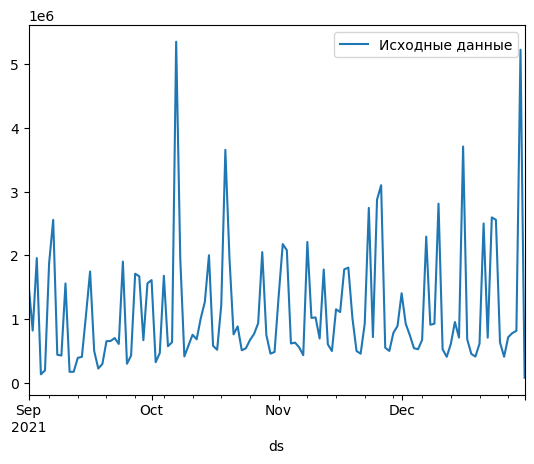

In [43]:
plot = df.plot(x="ds", y="y", label="Исходные данные")

In [44]:
from prophet import Prophet

In [45]:
#predict=30
#train_df = df[:-pred] 

In [46]:
#m = Prophet()
#m.fit(train_df)

In [47]:
#future = m.make_future_dataframe(periods=predict)
#forecast = m.predict(future)

In [49]:
df

,ds,y
121,2021-09-01,1542779
120,2021-09-02,820271
119,2021-09-03,1958340
118,2021-09-04,133318
117,2021-09-05,194381
...,...,...
4,2021-12-27,716678
3,2021-12-28,780446
2,2021-12-29,816734
1,2021-12-30,5230248


In [50]:
train.sort_values('ds')

,ds,y
121,2021-09-01,1542779
120,2021-09-02,820271
119,2021-09-03,1958340
118,2021-09-04,133318
117,2021-09-05,194381
...,...,...
35,2021-11-26,3102422
34,2021-11-27,550679
33,2021-11-28,500633
32,2021-11-29,784899


In [51]:
train_out = train.query('y <= 1000000')

In [52]:
test_out = test.query('y <= 1000000')

In [53]:
model = Prophet()
model.fit(train)
pred = model.predict(test)

15:42:03 - cmdstanpy - INFO - Chain [1] start processing
15:42:04 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
df

,ds,y
121,2021-09-01,1542779
120,2021-09-02,820271
119,2021-09-03,1958340
118,2021-09-04,133318
117,2021-09-05,194381
...,...,...
4,2021-12-27,716678
3,2021-12-28,780446
2,2021-12-29,816734
1,2021-12-30,5230248


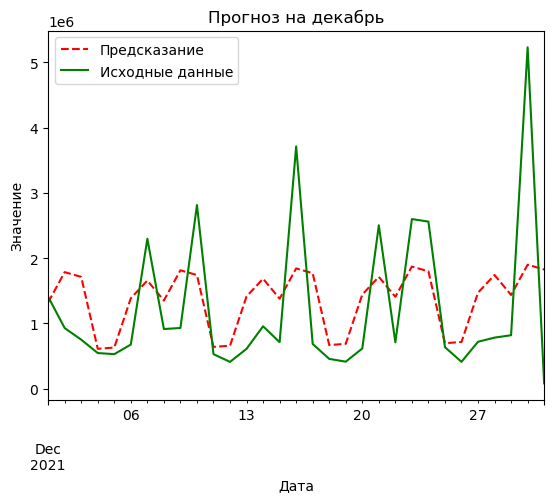

In [62]:
ax = pred.plot(x="ds", y="yhat", label="Предсказание", color="red", linestyle="--")
test.plot(x="ds", y="y", ax=ax, label="Исходные данные", color="green")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз на декабрь")
plt.legend()
plt.show()

In [56]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['y'], pred['yhat'])
print("MAPE:", mape)

MAPE: 153.39496001200894


In [65]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(f"MAPE: {(mean_absolute_percentage_error(pred.yhat, test.y)*100, 2)} %")

MAPE: (48.88729028297769, 2) %


In [66]:
model = Prophet()
model.fit(train_out)
forecast = model.predict(test_out)

15:47:40 - cmdstanpy - INFO - Chain [1] start processing
15:47:40 - cmdstanpy - INFO - Chain [1] done processing


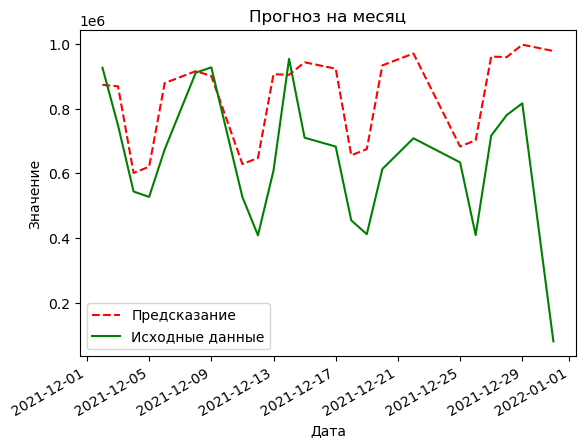

In [67]:
ax = forecast.plot(x="ds", y="yhat", label="Предсказание", color="red", linestyle="--")
test_out.plot(x="ds", y="y", ax=ax, label="Исходные данные", color="green")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз на месяц")
plt.legend()
plt.show()

In [70]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_out['y'].values, forecast['yhat'].values)
print("MAPE:", mape)

MAPE: 76.94464751517039


In [68]:
print(f"MAPE: {(mean_absolute_percentage_error(forecast.yhat, test_out.y)*100, 2)} %")

MAPE: (23.830283706077786, 2) %
